# Practice Problems

## Preamble

In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import quad
from scipy.interpolate import InterpolatedUnivariateSpline as interpolate
from scipy.optimize import root
from scipy.misc import derivative

import sympy as sp
import fractions as fra

from ipywidgets import interact

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
%run -i "rcParameters.py"
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["font.family"]='Times New Roman'
plt.rcParams["mathtext.fontset"]='stix';

In [3]:
# set fontsize in markdown cells
from IPython.core.display import display, HTML, Latex
display(HTML("<style>.rendered_html { font-size: 16px; }</style>"))

## Utility functions

In [4]:
# find fixed poits FP and their stability sFP
# input: function f(x;r) ; initial guess for FPs; parameter r
# output: [Sfp=stable FPs, Ufp=unstable FPs]
def fP(f,fP0,r,eps=1e-6):
    sol=root(f,fP0,args=(r,))
    Sfp = []; Ufp = []
    if sol.success:
        for x in sol.x:
            xp = derivative(f,x,dx=eps,args=(r,))
            if xp < 0:
                Sfp = np.append(Sfp,x)
            else:
                Ufp = np.append(Ufp,x)
    return [Sfp,Ufp]

In [5]:
# Phase portrait:  interact plot f(x;r) 
def int_fxr(f,dx,dr,dy,eps=1e-6,nx=100,col='r',ms=10,title='',x_lab=r'$\theta$',y_lab=r'$\dot{\theta}$'):
    x = np.linspace(dx[0],dx[1],nx)
    f_ = lambda x,r: interpolate(x,f(x,r))
    @interact(r=(dr[0],dr[1],dr[2]),grid=True)
    def update(r=dr[0],grid=True):
        # plot f(x;r) vs x
        fig, ax = plt.subplots(figsize=(8,5))
        ax.plot(x,f(x,r),c=col,ls='-',lw=3)
        ax.set_ylim(dy)
        ax.set_xlim(dx)
        ax.set_xlabel(x_lab)
        ax.set_ylabel(y_lab)
        ax.axhline(0,dx[0],dx[-1],c='k',lw=1)
        ax.grid(grid)
        # determine the fixed points x*
        FP = f_(x,r).roots()
        # plot x* if exist
        for x0 in FP:
            sFP=derivative(f,x0,dx=eps,args=(r,))
            if sFP < 0: # stable PF
                ax.plot(x0,0,'o',mfc=col,mec=col,ms=ms)
            else:
                ax.plot(x0,0,'o',mfc='w',mec=col,ms=ms)

        ax.set_title(title,color='b')
        plt.show()        

In [6]:
# Bifurcation diagram: x vs r
def BF_diag(f,x1,x2,r1,r2,nx=80,nr=80,title='',x_lab='$r$',y_lab='$x^\star$'):
    fx = lambda x,r: derivative(f,x,dx=1e-6,args=(r,))
    x=np.linspace(x1,x2,nx)
    r=np.linspace(r1,r2,nr)
    R,X = np.meshgrid(r,x)
    Z = f(X,R)
    Zx= fx(X,R)
    Zu= np.ma.masked_where(Zx<0,Z)
    Zs= np.ma.masked_where(Zx>0,Z)
    fig, ax=plt.subplots()
    cnt_S=ax.contour(R,X,Zs,levels=[0],colors='k',linewidths=3)
    cnt_U=ax.contour(R,X,Zu,levels=[0],colors='k',linewidths=3,linestyles='dashed')
    ax.grid()
    ax.set_xlabel(x_lab)
    ax.set_ylabel(y_lab)
    ax.set_title(title,color='b')
    plt.show()

In [7]:
# interactive Streamline plot: x(t;r)
def int_xtr(f,t_max,dx,dr,FP0,Ng=40,dens=[0.5,1],title=''):
    t = np.linspace(0,t_max,Ng)
    x = np.linspace(dx[0],dx[1],Ng)
    X,Y = np.meshgrid(t,x)
    @interact(r=(dr[0],dr[1],dr[2]),grid=False)
    def update(r=dr[0],grid=False):
        [Sx0,Ux0]=fP(f,FP0,r)
        # plot the slope field 
        fig, ax0=plt.subplots(figsize=(8,5))
        ax0.streamplot(X,Y, 1+0*X,f(Y,r),density=dens,
                      linewidth=1,color='k',arrowstyle='->')

        for x0 in Sx0:
            ax0.hlines(x0,0,t_max,colors='r',ls='-',lw=2)
        for x0 in Ux0:
            ax0.hlines(x0,0,t_max,colors='b',ls='--',lw=2)

        ax0.grid(grid)  
        ax0.set_xlim(0,t_max)
        ax0.set_ylim(dx)
        ax0.set_xlabel('$t$')
        ax0.set_ylabel('$x$')
        ax0.set_title(title,color='b')
        plt.show()

In [8]:
# set minor tick marks on/off; default on
def m_tick_on():
    plt.rcParams['xtick.minor.visible'] = True
    plt.rcParams['ytick.minor.visible'] = True
def m_tick_off():
    plt.rcParams['xtick.minor.visible'] = False
    plt.rcParams['ytick.minor.visible'] = False
    
m_tick_on()

## Problems 4.3.3 and 4.3.5

For the following dynamical equations, draw the phase portrait as a function of the control parameter $\mu$. Classify the bifurcations that occur as $\mu$ varies, and find all the bifurcation (critical) values of $\mu$.

##### 4.3.3.      $\dot{\theta}=\mu\sin\theta - \sin(2\theta)$

In [9]:
# phase portrait
int_fxr(lambda x,r: r*np.sin(x)-np.sin(2*x),[-0.5*np.pi,1.5*np.pi],[-3,3,0.2],[-4,4])

interactive(children=(FloatSlider(value=-3.0, description='r', max=3.0, min=-3.0, step=0.2), Checkbox(value=Tr…

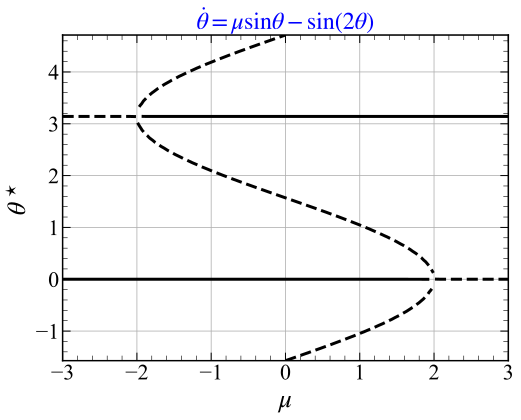

In [10]:
# bifurcation diagram
BF_diag(lambda x,r: r*np.sin(x)-np.sin(2*x),-0.5*np.pi,1.5*np.pi,-3,3, 
                    x_lab='$\mu$', y_lab=r'$\theta^\star$',title=r'$\dot{\theta}=\mu\sin\theta - \sin(2\theta)$')

##### 4.3.5.  $\dot\theta = \mu+\cos\theta+\cos(2\theta)$

In [11]:
# phase portrait
int_fxr(lambda x,r: r+np.cos(x)+np.cos(2*x),[0,2*np.pi],[-2.5,1.5,0.2],[-4,4])

interactive(children=(FloatSlider(value=-2.5, description='r', max=1.5, min=-2.5, step=0.2), Checkbox(value=Tr…

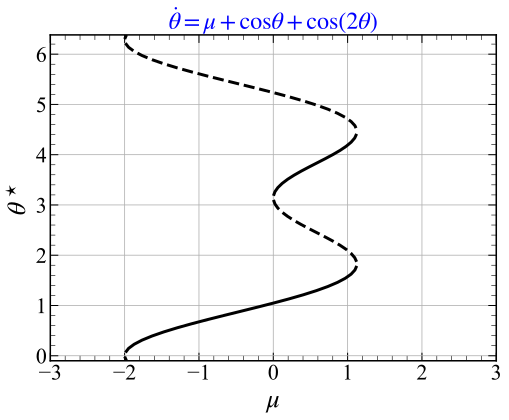

In [12]:
# bifurcation diagram
BF_diag(lambda x,r: r+np.cos(x)+np.cos(2*x),-0.1,2*np.pi+0.1,-3,3,x_lab='$\mu$', y_lab=r'$\theta^\star$',
        title=r'$\dot\theta = \mu+\cos\theta+\cos(2\theta)$')

## 3.7.3 A model of a fishery

The equation $\dot{N}=rN(1-N/K)-H$ provides an extremely simple model of a fishery. In the absence of fishing, the population is assumed to grow logistically. The effects of fishing are modeled by the term $-H$, which says that fish are caught or "harvested" at a constant rate $H>0$, independent of their population $N$. (This assumes that the fishermen aren't worried about fishing the population dry - they simply catch the same number of fish every day.) 

##### (a) Show that the system can be rewritten in dimensionless form as $dx/d\tau = x(1-x)-h$, for suitably defined dimensionless quantities $x$, $r$, and $h$.

##### (b) Plot the vector field for different values of $h$.

In [13]:
# phase portrait
int_fxr(lambda x,r: x*(1-x)-r,[0,1],[0,0.25,0.05],[-0.1,0.3])

interactive(children=(FloatSlider(value=0.0, description='r', max=0.25, step=0.05), Checkbox(value=True, descr…

##### (c) Show that a bifurcation occurs at a certain value $h_c$, and classify this bifurcation.

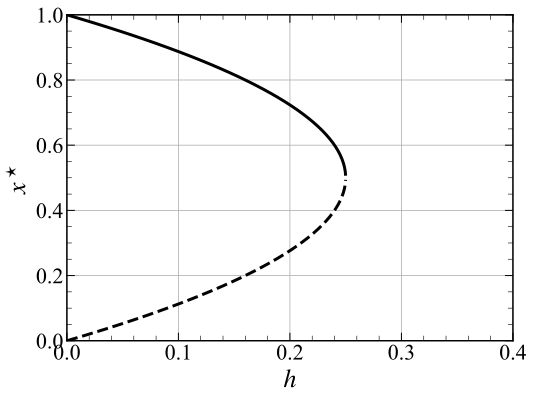

In [14]:
# bifurcation diagram
BF_diag(lambda x,r: x*(1-x)-r,0,1,0,0.4,x_lab='$h$')

##### (d) Discuss the long-term behavior of the fish population for $h<h_c$ and $h>h_c$, and give the biological interpretation in each case.

There's something silly about this model-the population can become negative! A better model would have a fixed point at zero population for all values of $H$. See the next exercise for such an improvement.

## 3.7.4 Improved model of a fishery

A refinement of the model of the above fishery is $\dot{N}=rN(1-N/K)-H N/(A+N)$, where $H>0$ and $A>0$. This model is more realistic in two respects: it has a fixed point at $N=0$ for all values of the parameters, and the rate at which fish are caught decreases with $N$. This is plausible - when fewer fish are available, it is harder to find them and so the daily catch drops.

##### (a) Give a biological interpretation of the parameter A; what does it measure?

##### (b) Show that the system can be rewritten in dimensionless form as $dx/d\tau=x(1-x)-h x/(a+x)$, for suitably defined dimensionless quantities $x$ , $\tau$ , $a$, and $h$.

##### (c) Show that the system can have one, two, or three fixed points, depending on the values of a and h . Classify the stability of the fixed points in each case.

Bifurcation diagram $x^*=x^*(a;h)$

In [15]:
f_ = lambda x,h,a: x*(1-x)-h*x/(a+x)

@interact(h=(0,1.5,0.1))
def update(h=0):
    f = lambda x,a: f_(x,h,a)
    BF_diag(f,-0.02,1.1,0,1.5,x_lab='$a$')

interactive(children=(FloatSlider(value=0.0, description='h', max=1.5), Output()), _dom_classes=('widget-inter…

In [16]:
# find the fixed points f(x*;h,a)=0
x,h,a = sp.symbols('x h a')
sol_f_ = sp.solve(f_(x,h,a),x)
[display(sol) for sol in sol_f_];

0

-(a - 1)/2 - sqrt(a**2 + 2*a - 4*h + 1)/2

-(a - 1)/2 + sqrt(a**2 + 2*a - 4*h + 1)/2

In [17]:
# find the stability of the fixed points
fp_= lambda x,h,a: f_(x,h,a).diff(x).simplify()
display(Latex('$f_x(x;h,a) = {}$'.format(sp.latex(fp_(x,h,a)))))
fp_0 = lambda h,a: fp_(x,h,a).subs(x,0)
display(Latex('$f_x(0;h,a) = {}$'.format(sp.latex(fp_0(h,a)))))
fp_p = lambda h,a: fp_(x,h,a).subs(x,sol_f_[2]).simplify()
display(Latex('$f_x(x_+;h,a) = {}$'.format(sp.latex(fp_p(h,a)))))
fp_m = lambda h,a: fp_(x,h,a).subs(x,sol_f_[1]).simplify()
display(Latex('$f_x(x_-;h,a) = {}$'.format(sp.latex(fp_m(h,a)))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Bifurcation diagram $x^*=x^*(h;a)$

In [18]:
@interact(a=(0,1.5,0.1),grid=True)
def update(a=0):
    f = lambda x,h: f_(x,h,a)
    BF_diag(f,-0.02,1.1,0,1.5,x_lab='$h$')

interactive(children=(FloatSlider(value=0.0, description='a', max=1.5), Output()), _dom_classes=('widget-inter…

##### (d) Analyze the dynamics near $x=0$ and show that a bifurcation occurs when $h=a$. What type of bifurcation is it?

In [19]:
f0_ = f_(x,h,a).series(x,0,3).removeO()
f0_

x**2*(-1 + h/a**2) + x*(1 - h/a)

##### (e) Show that another bifurcation occurs when $h=(a+1)^2/4$, for $a<a_c$, where $a_c$, is to be determined. Classify this bifurcation.

##### (f) Plot the stability diagram of the system in $(a, h)$ parameter space. Can hysteresis occur in any of the stability regions?

In [20]:
# find the critical values of the parameters
fp_= lambda x,h,a: f_(x,h,a).diff(x).simplify()
h_c,a_c = sp.solve([f_(x,h,a),fp_(x,h,a)],[h,a])[0]
display(Latex('$h_c(x) = {};\quad a_c(x) = {} $'.format(sp.latex(h_c),sp.latex(a_c))))
display(Latex('$f_x(0,h,a) = {} \;\\Rightarrow\; x^\star = 0$ is stable (unstable) for $h>a\;$ $(h<a)$'
              .format(sp.latex(fp_(x,h,a).subs(x,0)))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

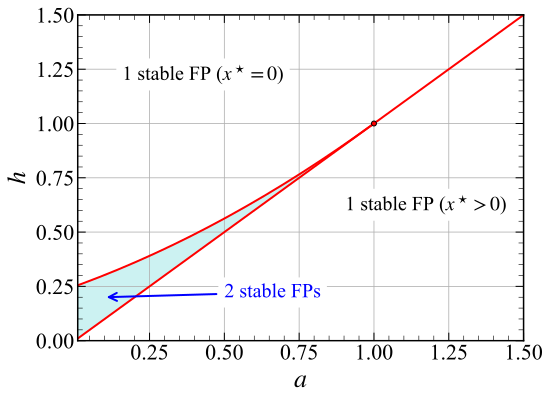

In [21]:
# determine (h,a) for the critical points 
xx = np.linspace(0,1.5,50)
h_c_ = np.asarray([h_c.subs(x,z) for z in xx],float)
a_c_ = np.asarray([a_c.subs(x,z) for z in xx],float)
h_c0 = lambda a: a  # for x*=0, f'(0,h,a)=1-h/a

# plot h(a) for the critical points 
# h(a) separates the regions with different number/types of FPs
fig, ax=plt.subplots()
ax.plot(a_c_,h_c_,color='r',linewidth=2)
ax.plot(xx,h_c0(xx),c='r',lw=2)
ax.fill_between(a_c_,h_c_,a_c_,color='c',alpha=0.2)
ax.plot(1,1,'ro',ms=5,mec='k',lw=1)
ax.text(0.1,0.8,'1 stable FP ($x^\star =0$)',transform=ax.transAxes,fontsize=20,
       bbox=dict(boxstyle="round", fc='w', ec="none"))
ax.text(0.6,0.4,'1 stable FP ($x^\star >0 $)',transform=ax.transAxes,fontsize=20,
       bbox=dict(boxstyle="round", fc='w', ec="none"))
ax.annotate('2 stable FPs',xy=(0.1,0.2),xytext=(0.5,0.2),fontsize=20,color='b',
           arrowprops=dict(color='b', arrowstyle='->',lw=2),
            bbox=dict(boxstyle="round", fc='w', ec="none")
           )
ax.grid()
ax.set_xlim(0.01,1.5)
ax.set_ylim(0,1.5)
ax.set_xlabel('$a$')
ax.set_ylabel('$h$')
plt.show()